## Implementing multiple linear regression using numpy

In [1]:
'''
Name : Harsha Vattem
Roll No: 15CS10015

Assignment 1a
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('Concrete_Data.csv')
df.head()

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape[0], X.shape[1] 

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

def shuffle_dataset(X,Y):
    
    shuff = np.arange(len(X))
    np.random.shuffle(shuff)
    print(shuff)
    X=X[shuff]
    Y=Y[shuff]
    
    return X, Y

X, Y = shuffle_dataset(X, Y)

training_size = int(0.8*rows)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]


1030 8
[ 31 109 136 ... 466 121 860]


## Defining the Linear Regression class 

In [2]:
class LinearRegression(object):
    def __init__(self):        
        self.w = np.random.uniform(-1.,1.,cols)
        self.b = np.random.uniform(-1,1)
    
    def forward(self, x):
        return np.add(np.dot(x, self.w), self.b)
    
    def backward(self, x, ypred, y_train, lr):
        self.w = self.w - (lr * (1/len(x)) * np.dot(ypred - y_train, x))
        self.b = self.b - (lr * (1/len(x)) * np.sum(ypred - y_train))
                
def MSELoss(y, ypred):
    n = y.size
    loss_array = np.square(y - ypred)
    loss = np.sum(loss_array)
    loss = loss/n
    
    return loss/2

Starting Training with Gradient Descent
Loss fuction decrease after 10000 epochs of training


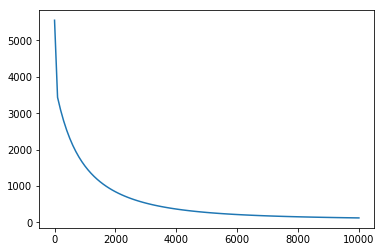

Final training loss: 124.74264817019981
Starting to test
Final test loss: 121.07114606545504


In [3]:
print('Starting Training with Gradient Descent')
lreg = LinearRegression()
epochs = 10000
learning_rate = 0.0000001

loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    ypred = lreg.forward(X_train)
    loss = MSELoss(y_train, ypred) 
    if e==0 or (e+1)%100==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
    lreg.backward(X_train, ypred, y_train, learning_rate)

print('Loss fuction decrease after ' + str(epochs) + ' epochs of training')
plt.plot(epoch_history, loss_history)
plt.show()
   
y_train_loss= np.sum(loss)
print('Final training loss: ' + str(y_train_loss))
print('Starting to test')
ytest_pred= lreg.forward(X_test)
loss= MSELoss(y_test, ytest_pred)
print('Final test loss: ' + str(loss))